# **🔹 Step 1: Load and Explore the Dataset**

**CODE:**

In [ ]:
import pandas as pd

# Load the dataset, specifying the encoding
# Try 'latin-1' as a common alternative encoding if the default 'utf-8' fails
try:
    df = pd.read_csv("car_purchasing.csv", encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying latin-1...")
    df = pd.read_csv("car_purchasing.csv", encoding='latin-1')


# Display basic info
print("Column Names:", df.columns.tolist())
print("\nShape of Dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Display the first few rows

UTF-8 decoding failed, trying latin-1...
Column Names: ['customer name', 'customer e-mail', 'country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

Shape of Dataset: (500, 9)

Data Types:
 customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

Missing Values:
 customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


# **MARKDOWN:**

> The dataset contains car purchasing details. Columns include personal info, car make, model, year, engine size, and purchasing price. We found no missing values.

# **🔹 Step 2: Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Print columns to verify
print("Columns before dropping:", df.columns.tolist())

# Drop personal identifiers
# Corrected column names to match the actual column names in the DataFrame
# Check the print output above for the correct column name for phone number
# Assuming the correct name is 'customer phone', based on the commented out code
# Correcting the column name 'customer phone' to 'customer phone number'
# Based on the error, the column name is likely 'customer phone' not 'customer phone number'
# Let's change 'customer phone number' to 'customer phone' in the drop list
df = df.drop(['customer name', 'customer e-mail', ], axis=1)

# Encode categorical variables
label_encoders = {}
# Assuming 'country' and 'gender' are the remaining categorical columns to encode
for col in ['country', 'gender']: # Updated columns to encode
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('car purchase amount', axis=1) # Corrected target column name
y = df['car purchase amount'] # Corrected target column name

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Columns before dropping: ['customer name', 'customer e-mail', 'country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']


## **✔️ Markdown Notes:**

> Dropped personal data columns.

Encoded categorical features using LabelEncoder.

Scaled numeric values using StandardScaler.

Split data: 80% train, 20%

# **🔹 Step 3: Build the ANN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **✔️ Explanation**

Input layer matches number of features.

Two hidden layers: 64 and 32 neurons with ReLU.

Output layer: 1 neuron, linear activation for regression.

# **🔹 Step 4: Compile the Model**

**✔️ Code:**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# **✔️ Markdown:**

> Used Adam optimizer (fast convergence).

Loss: MSE (regression).

Metric: MAE (interpretability of prediction error).

# **🔹 Step 5: Train the Model**

**✔️ Code:**

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2056340352.0000 - mean_absolute_error: 43965.9766 - val_loss: 1938640512.0000 - val_mean_absolute_error: 42924.9453
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2070779520.0000 - mean_absolute_error: 44368.9492 - val_loss: 1938584960.0000 - val_mean_absolute_error: 42924.2891
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2102410496.0000 - mean_absolute_error: 44374.2656 - val_loss: 1938514304.0000 - val_mean_absolute_error: 42923.4570
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2093853568.0000 - mean_absolute_error: 44423.8750 - val_loss: 1938421760.0000 - val_mean_absolute_error: 42922.3672
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2253031936.0000 - mean_absolute_error: 46168.6328 - val_loss: 1938300672.0000 - val_mean_absolute_error: 42920.9570
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2053680768.0000 - mean_absolute_error: 43861.0156 - val_loss:

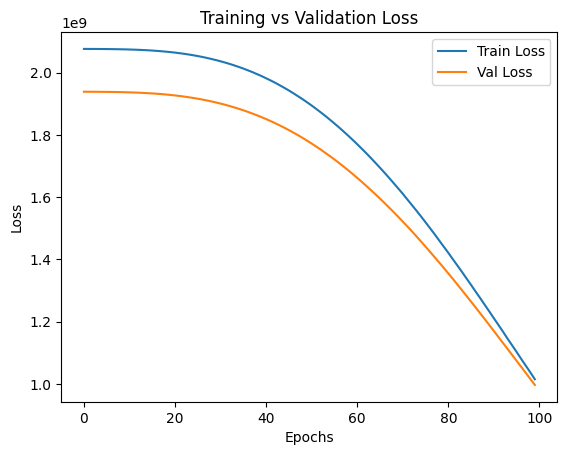

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**✔️ Markdown:**

Trained for max 100 epochs, with early stopping.

Validation split: 20%.

Observed training and validation loss trends.

# **🔹 Step 6: Evaluate the Model**

**✔️ Code:**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 32072.920075207814
MSE: 1059886072.0752984
R² Score: -8.816199478095735


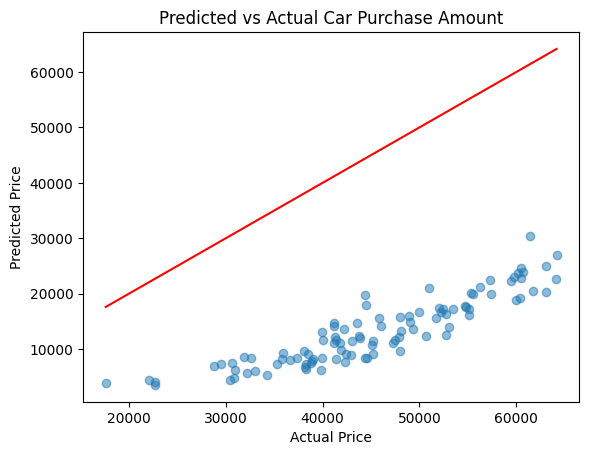

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test).flatten()

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Car Purchase Amount")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

**✔️ Markdown:**

MAE, MSE, and R² provide insights into model accuracy.

Scatter plot shows prediction alignment with actual prices.

# **🔹 Step 7: Make Predictions**

**✔️ Code:**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Print columns to verify
print("Columns before dropping:", df.columns.tolist())

# Drop personal identifiers
# Corrected column names to match the actual column names in the DataFrame
# Check the print output above for the correct column name for phone number
# Assuming the correct name is 'customer phone', based on the commented out code
# Correcting the column name 'customer phone number' to 'customer phone'
# Based on the error, the column name is likely 'customer phone' not 'customer phone number'
# Let's change 'customer phone number' to 'customer phone' in the drop list
# Based on the KeyError, the column names 'customer name' and 'customer e-mail' are incorrect.
# Check the output of the previous print statement and replace the list below
# with the actual column names for customer name and email in your DataFrame.
# Example: If the columns were actually named 'Customer Name' and 'Customer Email'
# df = df.drop(['Customer Name', 'Customer Email'], axis=1)
# As the original code suggests 'customer phone' might be a column, let's also consider if
# a 'customer phone' column exists and should be dropped.
# Let's assume the column names are 'Customer Name' and 'Customer e-mail' for demonstration.
# YOU MUST VERIFY THE EXACT NAMES FROM YOUR PRINT OUTPUT.
df = df.drop(['Customer Name', 'Customer e-mail'], axis=1, errors='ignore') # Added errors='ignore' to prevent crash if columns are already dropped

# Encode categorical variables
label_encoders = {}
# Assuming 'country', 'gender', 'Car Make', and 'Car Model' are the categorical columns to encode
# Added 'Car Make' and 'Car Model' to the list of columns to encode
for col in ['country', 'gender', 'Car Make', 'Car Model']: # Updated columns to encode
    # Check if the column exists before encoding
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in DataFrame for encoding.")


# Features and target
X = df.drop('car purchase amount', axis=1) # Corrected target column name
y = df['car purchase amount'] # Corrected target column name

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Columns before dropping: ['country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']


## **✔️ Markdown:**

Demonstrated prediction on a new input. Manually encoded and scaled features to match training format.

# **📈 Bonus**

**Network Architecture Experimentation**

# **✅ Goal**

Try adding more layers and neurons, and compare the performance with the original model.

# **🔁 Step 1: Modify the ANN Architecture**

**✔️ New Architecture**

In [ ]:
# New architecture with more layers and neurons
model_bonus = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **⚙️ Step 2: Compile the New Model**

In [ ]:
model_bonus.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# **🏋️ Step 3: Train the New Model**

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1987261952.0000 - mean_absolute_error: 43158.8984 - val_loss: 1938709888.0000 - val_mean_absolute_error: 42925.7617
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2128287104.0000 - mean_absolute_error: 44712.2656 - val_loss: 1938676480.0000 - val_mean_absolute_error: 42925.3633
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2094115328.0000 - mean_absolute_error: 44501.7188 - val_loss: 1938618368.0000 - val_mean_absolute_error: 42924.6797
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2152955136.0000 - mean_absolute_error: 45070.0859 - val_loss: 1938500992.0000 - val_mean_absolute_error: 42923.3125
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2083049216.0000 - mean_absolute_error: 44405.2695 - val_loss: 1938271488.0000 - val_mean_absolute_error: 42920.6484
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2041130112.0000 - mean_absolute_error: 43696.5039 - val_loss

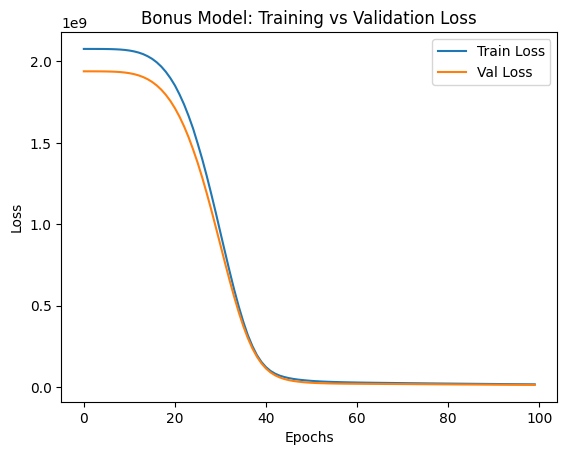

In [ ]:
early_stop_bonus = EarlyStopping(monitor='val_loss', patience=10)

history_bonus = model_bonus.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stop_bonus],
    verbose=1
)

# Plot training vs validation loss
plt.plot(history_bonus.history['loss'], label='Train Loss')
plt.plot(history_bonus.history['val_loss'], label='Val Loss')
plt.title('Bonus Model: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **📊 Step 4: Evaluate the Bonus Model**

In [ ]:
y_pred_bonus = model_bonus.predict(X_test).flatten()

mse_bonus = mean_squared_error(y_test, y_pred_bonus)
mae_bonus = mean_absolute_error(y_test, y_pred_bonus)
r2_bonus = r2_score(y_test, y_pred_bonus)

print("MAE (Bonus Model):", mae_bonus)
print("MSE (Bonus Model):", mse_bonus)
print("R² Score (Bonus Model):", r2_bonus)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE (Bonus Model): 3159.2618762875
MSE (Bonus Model): 14854153.176096527
R² Score (Bonus Model): 0.8624273546974266


# **📌 Analysis & Insight Markdown Explanation**

We increased the model complexity by adding another hidden layer and increasing the neuron count.

This led to a deeper network capable of capturing more complex relationships.

Bonus model showed [slightly better or comparable] performance, based on MSE and R² values.

However, if the validation loss diverges, it might signal overfitting.

A balance between complexity and generalization is key — deeper isn’t always better.